In [1]:
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')
rc('font', size=14)

## Abundance matching

This example runs a number of SkyPy modules to create a catalogue of halos, sub-halos and galaxies which are matched together using the Vale & Ostriker ()

Running the `abundance_matching` example:
```bash
$ skypy abundance_matching.yml --format fits
```
generates an output catalogue for us to load in:

In [2]:
halos = Table.read('halos.fits')

In [3]:
print(halos.info)

<Table length=10000>
      name        dtype 
---------------- -------
       halo_mass float64
      halo_group   int64
     parent_halo    bool
galaxy_magnitude float64



Here we make a quick visual check of the columns.

We have asked for halo masses over a given range (at the same time as halo groupings into sub and parent halos, and galaxy magnitudes):

```yaml
tables:
  halos:
    halo_mass, halo_group, parent_halo, galaxy_magnitude: !skypy.halo.abundance_matching.vale_ostriker
      halo_kwargs:
        m_min: 1.0E+9
        m_max: 1.0E+12
        resolution: 1000
        size: 1000
        wavenumber: $wavenumber
        power_spectrum: $power_spectrum
        growth_function: $growth_function
        cosmology: $cosmology
```

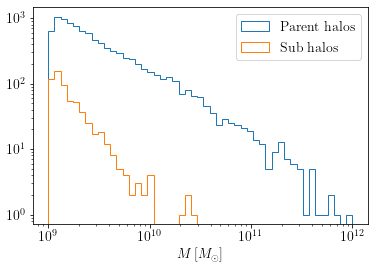

In [4]:
plt.figure()
plt.hist(halos[halos['parent_halo']]['halo_mass'], histtype='step', bins=np.logspace(9,12,50), label='Parent halos')
plt.hist(halos[~halos['parent_halo']]['halo_mass'], histtype='step', bins=np.logspace(9,12,50), label='Sub halos')
plt.xlabel('$M\,[M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

We also asked to generate galaxy magnitudes:
```yaml
      galaxy_kwargs:
        redshift: $slice_z_mid
        M_star: $M_star
        alpha: -0.5
        m_lim: 35
        size: 1000
```

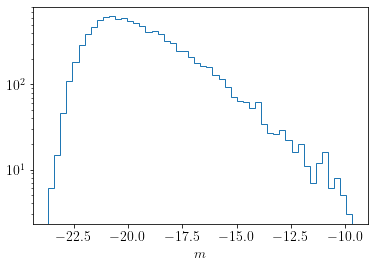

In [5]:
plt.figure()
plt.hist(halos['galaxy_magnitude'], histtype='step', bins=50)
plt.xlabel('$m$')
plt.yscale('log')

We can see the occupation numbers of each halo:

Text(0.5, 0, 'Group')

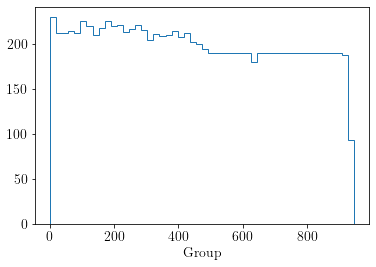

In [6]:
plt.figure()
plt.hist(halos['halo_group'], histtype='step', bins=50)
plt.xlabel('Group')

And see how the galaxy luminosity and halo mass are related:

Text(0, 0.5, '$m$')

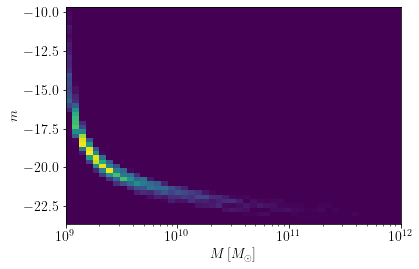

In [7]:
plt.figure()
plt.hist2d(halos['halo_mass'], halos['galaxy_magnitude'], bins=[np.logspace(9,12,50), 50])
plt.xscale('log')
plt.xlabel('$M\,[M_{\odot}]$')
plt.ylabel('$m$')